# Analysis

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [3]:
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
from src.models.model_setup import ModelSetup
from src.xr_utils import open_dataset, open_dataarray
from src.configs.load_config import load_config

In [5]:
import os

In [28]:
from src.plot_utils import add_units

In [6]:
# run_dir = "/home/users/sithom/seager19/logs/fix_ts_trend/wandb/run-20210616_083832-3athbzpm/files"
run_dir = "/home/users/sithom/seager19/logs/fix_tau_bomb_2/wandb/run-20210616_131508-1dt3zohb/files"

In [7]:
cfg = load_config(test=False)
setup = ModelSetup(run_dir, cfg,  make_move=False)

In [8]:
run_dir

'/home/users/sithom/seager19/logs/fix_tau_bomb_2/wandb/run-20210616_131508-1dt3zohb/files'

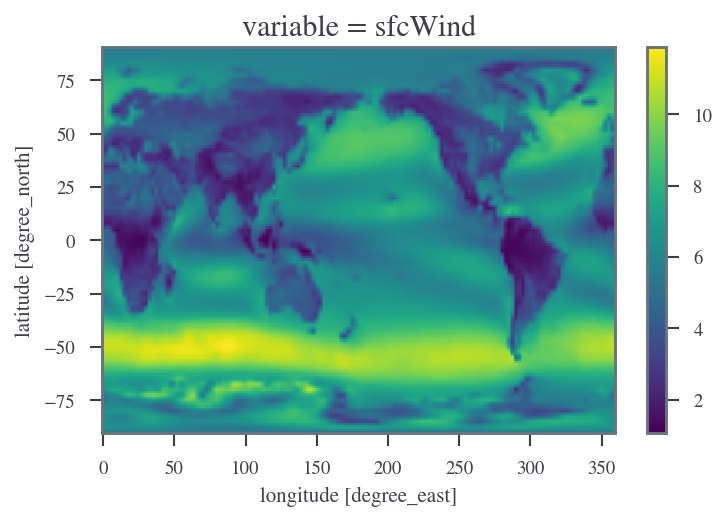

In [9]:
open_dataarray(setup.ecmwf_sfcwind()).plot()

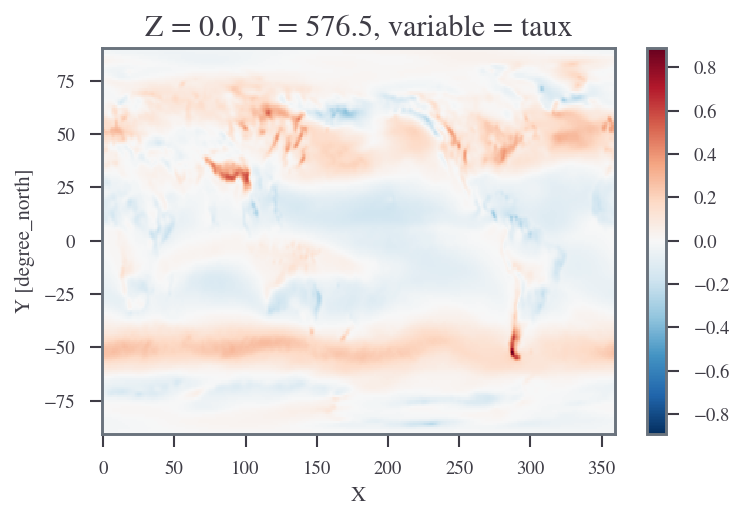

In [10]:
open_dataarray(setup.tau_x(it=1)).isel(T=600).plot()

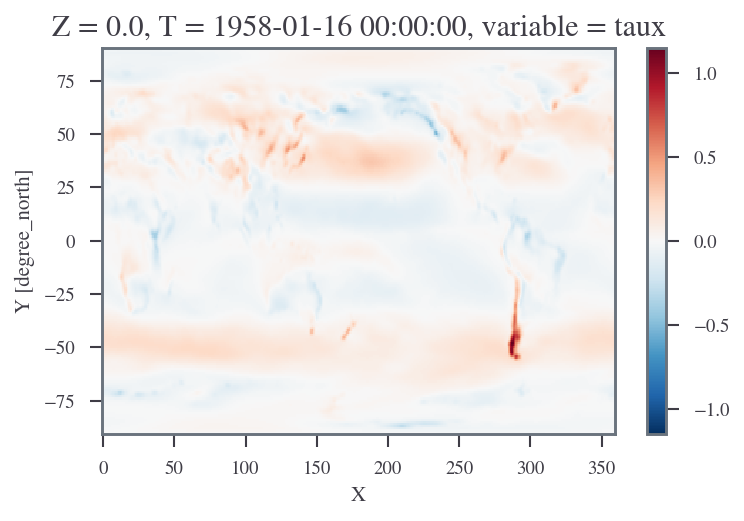

In [25]:
open_dataarray(setup.tau_x(it=0)).isel(T=0).plot()

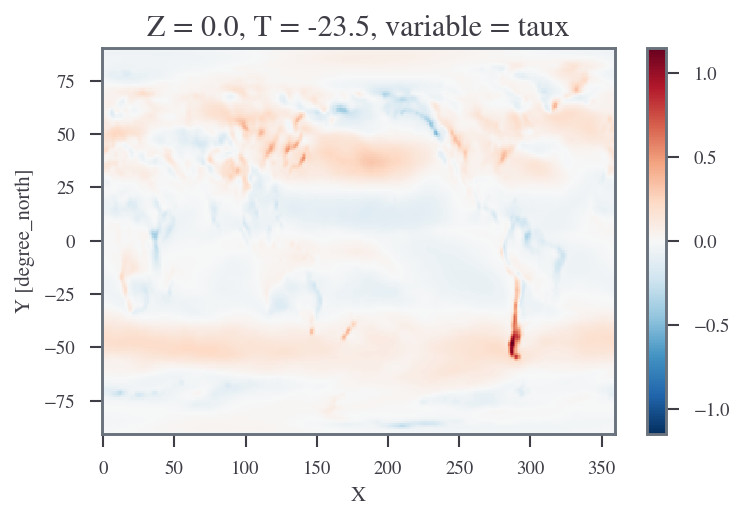

In [12]:
open_dataarray(setup.tau_x(it=1)).isel(T=0).plot()

In [30]:
import matplotlib.pyplot as plt

(<Figure size 826.772x510.973 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

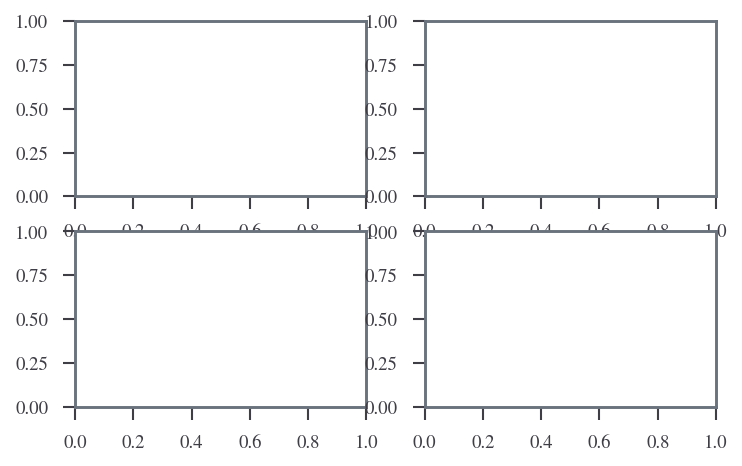

In [31]:
fig, ((axa, axb), (axc, axd) = plt.subplots(2, 2)

In [38]:
open_dataarray(setup.ts_clim60(it=i))

<xarray.DataArray (variable: 1, Y: 121, X: 360)>
array([[[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        ...,
        [  0.     ,   0.     ,   0.     , ..., 282.94315,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ]]], dtype=float32)
Coordinates:
  * X         (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y         (Y) float32 -60.0 -59.0 -58.0 -57.0 -56.0 ... 57.0 58.0 59.0 60.0
  * variable  (variable) <U2 'ts'

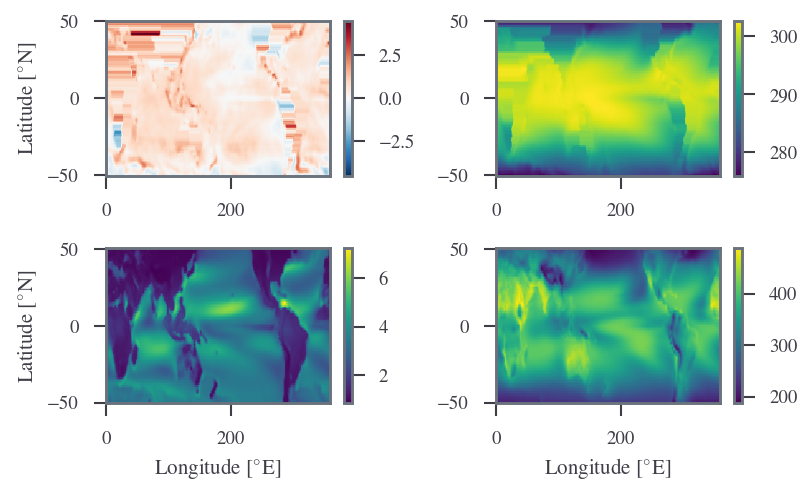

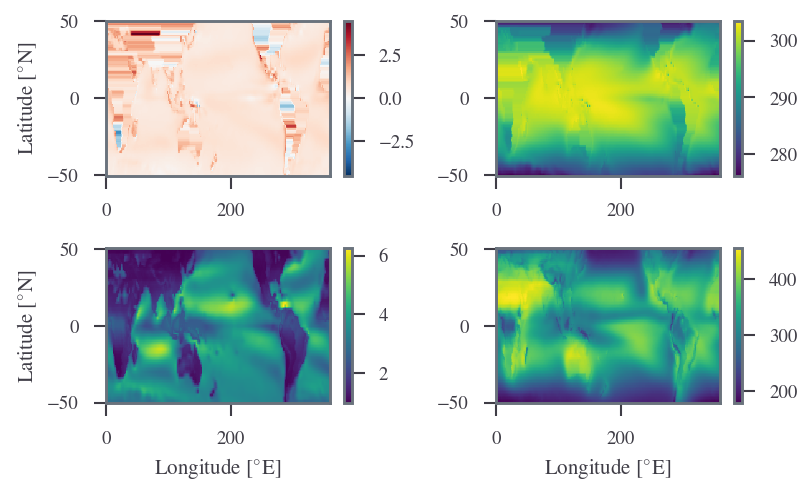

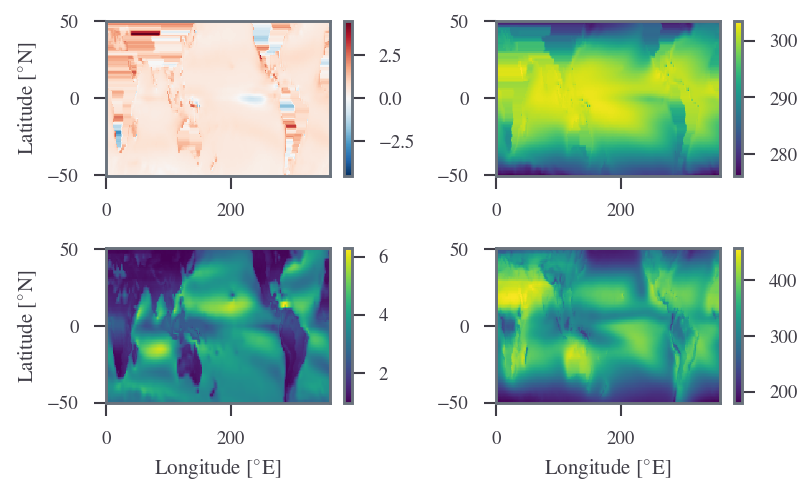

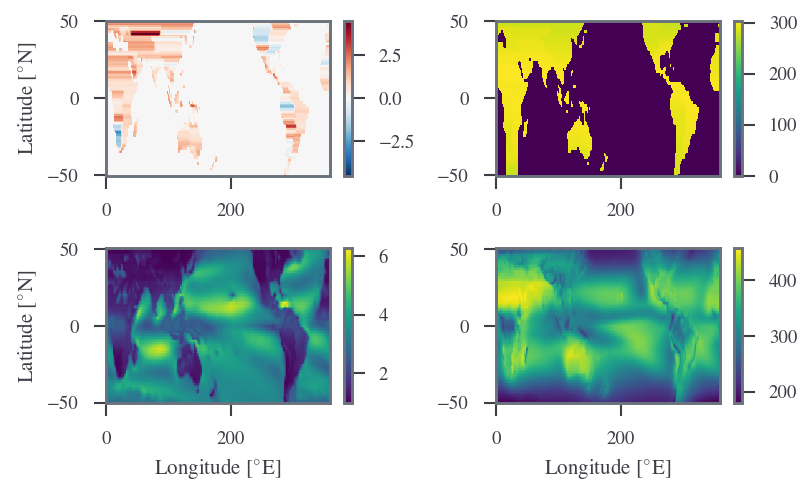

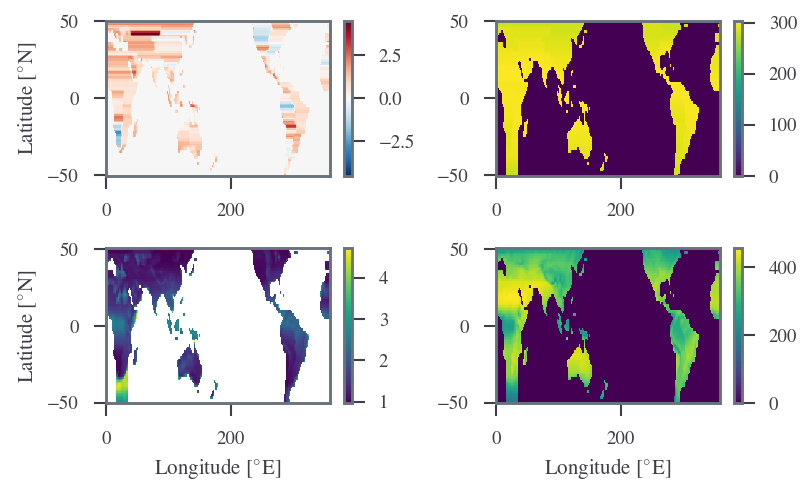

In [45]:
for i in range(5):
    fig, ((axa, axb), (axc, axd)) = plt.subplots(2, 2)
    add_units(open_dataarray(setup.ts_trend(it=i))).sel(Y=slice(-50, 50)).plot(ax=axa)
    axa.set_title("")
    axa.set_xlabel("")
    # add_units(open_dataarray(setup.ts(it=i))).isel(T=1).plot(ax=axb)
    add_units(open_dataarray(setup.ts_clim60(it=i))).sel(Y=slice(-50, 50)).plot(ax=axb)
    axb.set_title("dQ")
    axb.set_xlabel("")
    axb.set_ylabel("")
    add_units(open_dataarray(setup.dq_dt(it=i))).isel(T=1).sel(Y=slice(-50, 50)).plot(ax=axc)
    axc.set_title("")
    add_units(open_dataarray(setup.dq_df(it=i))).isel(T=1).sel(Y=slice(-50, 50)).plot(ax=axd)
    axd.set_title("dQdf")
    axd.set_ylabel("")
    plt.tight_layout()
    plt.show()

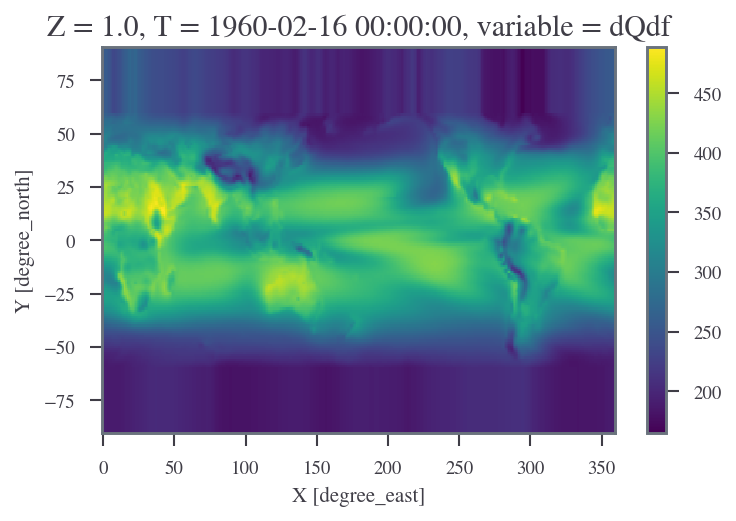

In [14]:
open_dataarray(setup.dq_df(it=0)).isel(T=1).plot()

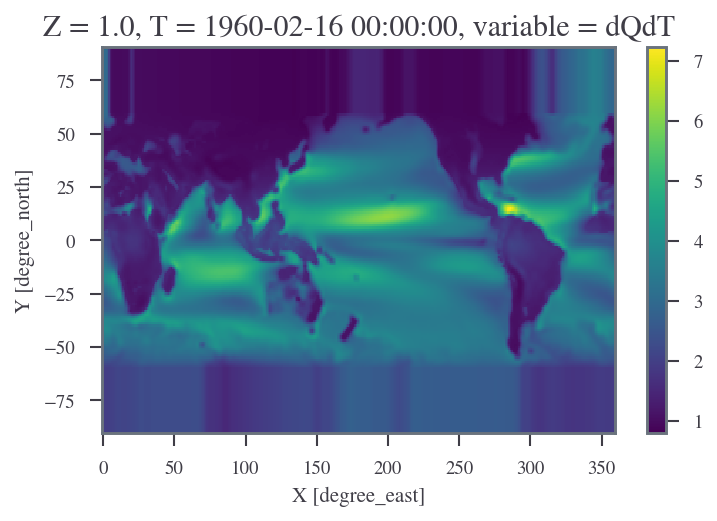

In [15]:
open_dataarray(setup.dq_dt(it=0)).isel(T=1).plot()

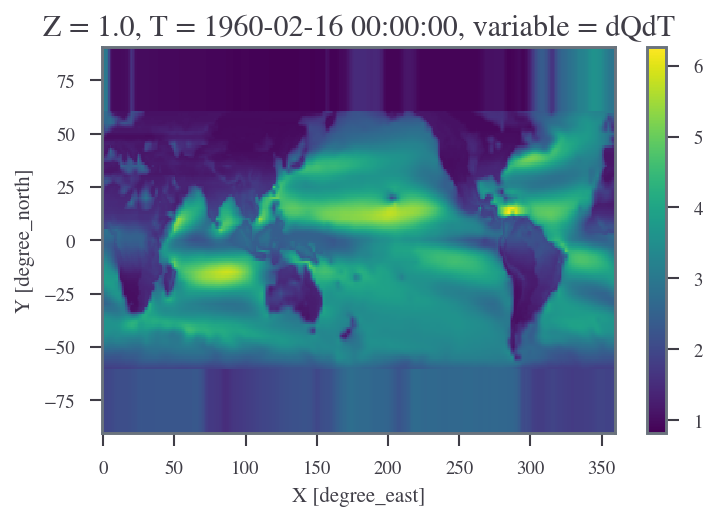

In [16]:
open_dataarray(setup.dq_dt(it=1)).isel(T=1).plot()

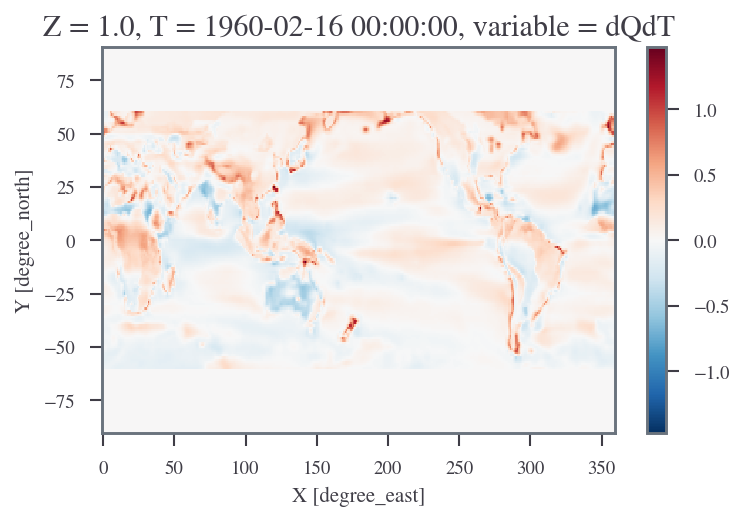

In [17]:
(
    (
        open_dataarray(setup.dq_dt(it=1)).isel(T=1)
        - open_dataarray(setup.dq_dt(it=0)).isel(T=1)
    )
    / open_dataarray(setup.dq_dt(it=0)).isel(T=1)
).plot()

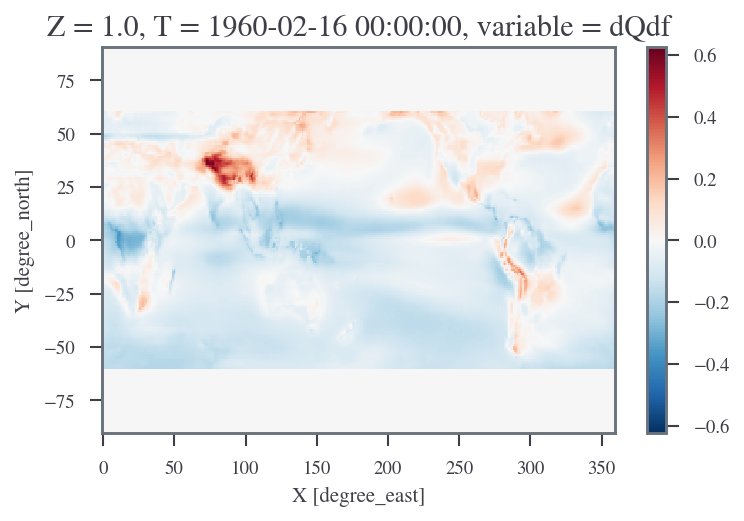

In [18]:
(
    (
        open_dataarray(setup.dq_df(it=1)).isel(T=1)
        - open_dataarray(setup.dq_df(it=0)).isel(T=1)
    )
    / open_dataarray(setup.dq_df(it=0)).isel(T=1)
).plot()

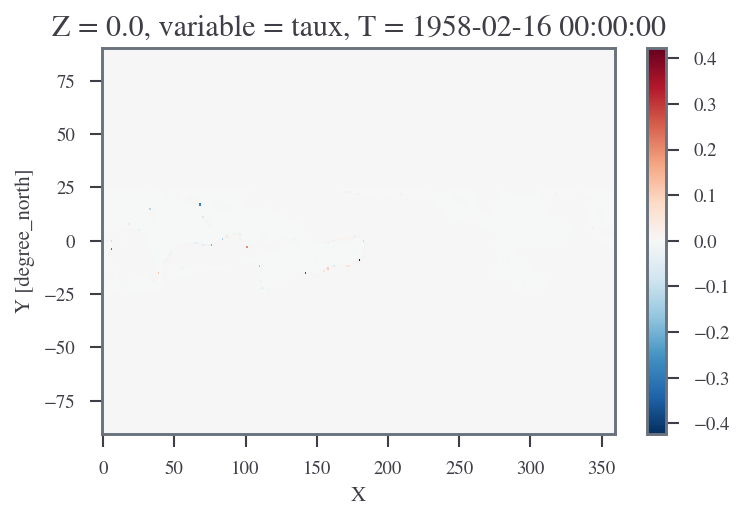

In [19]:
(
    (
        open_dataarray(setup.tau_x(it=1)).isel(T=1)
        - open_dataarray(setup.tau_x(it=0)).isel(T=1)
    )
    / open_dataarray(setup.tau_x(it=0)).isel(T=1)
).plot()

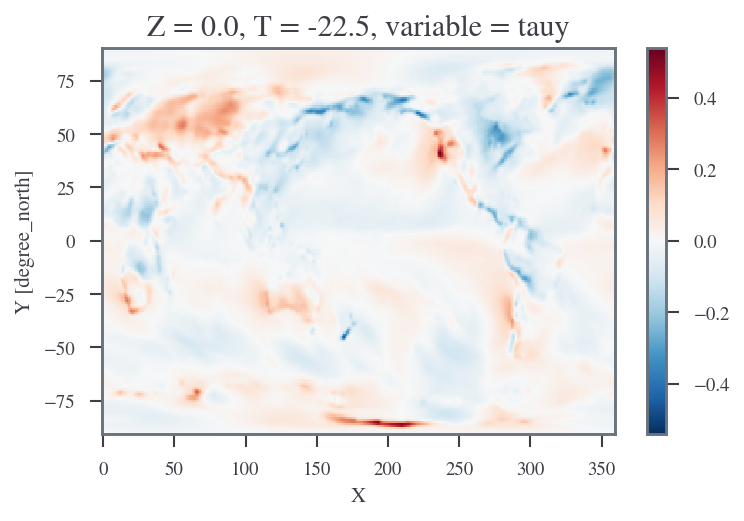

In [20]:
open_dataarray(setup.tau_y(it=1)).isel(T=1).plot()

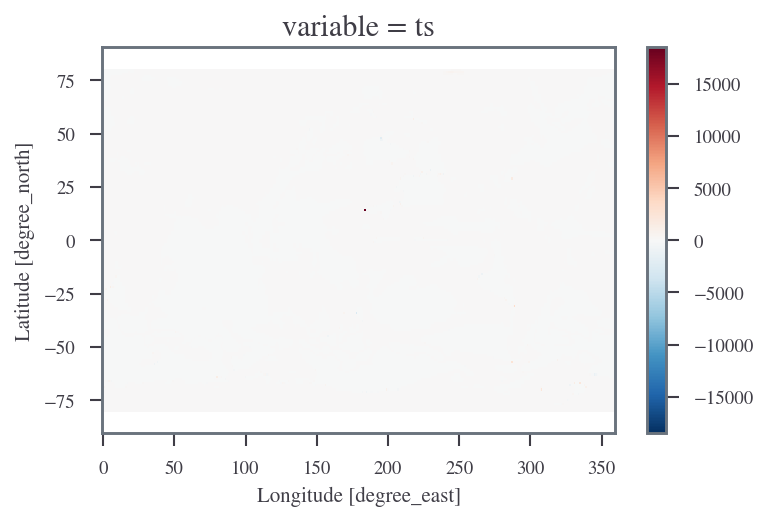

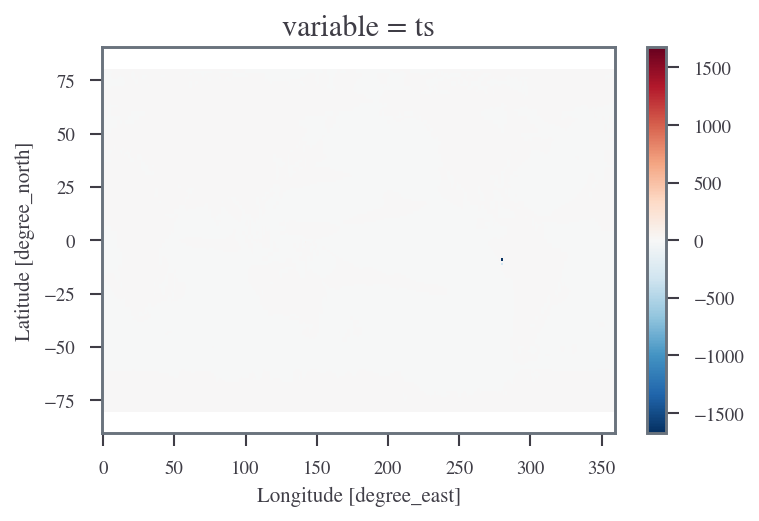

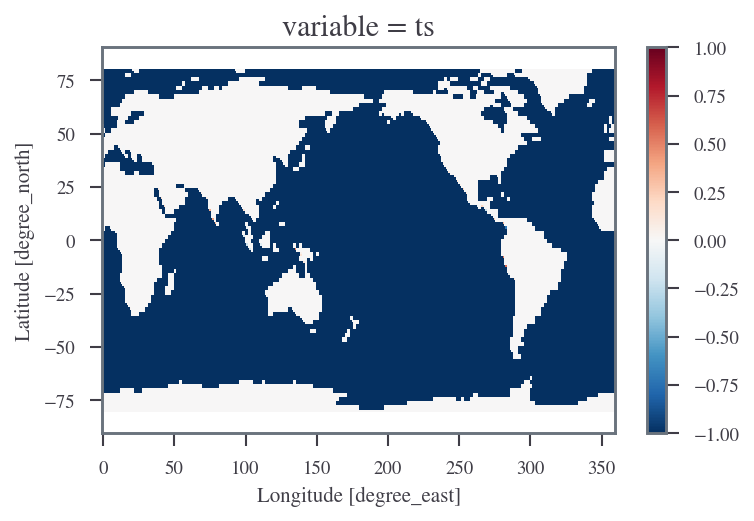

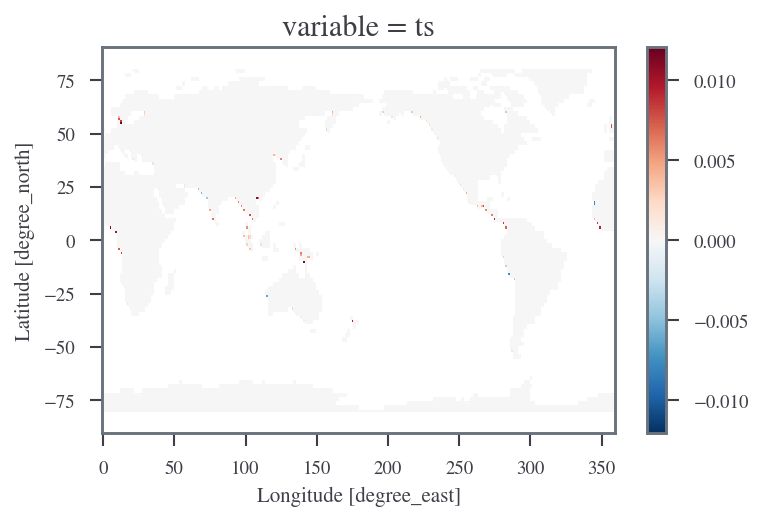

In [21]:
for i in range(1, 5):
    (
        (
            open_dataarray(setup.ts_trend(it=i))
            - open_dataarray(setup.ts_trend(it=i-1))
        )
        / open_dataarray(setup.ts_trend(it=i-1))
    ).plot()
    plt.show()

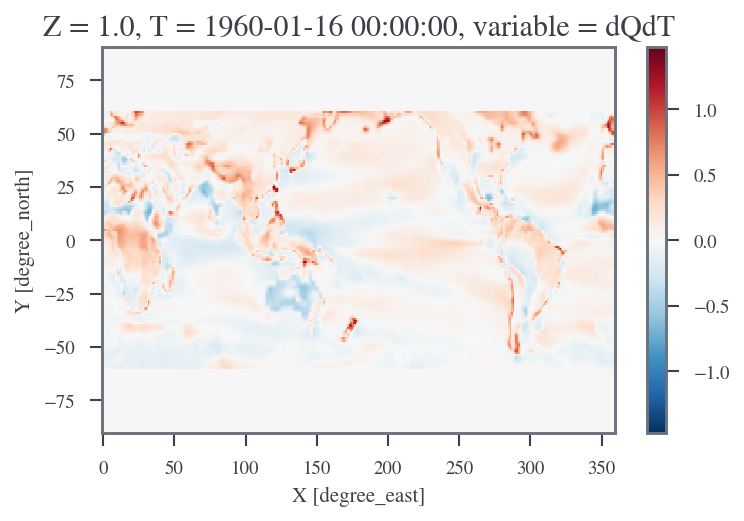

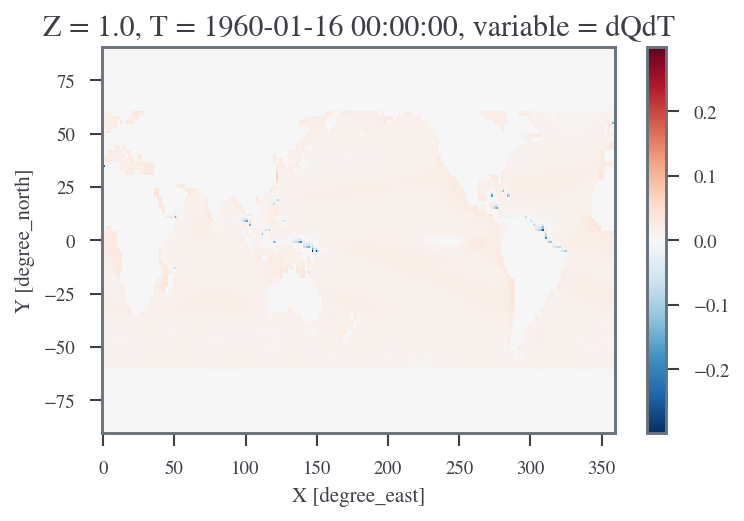

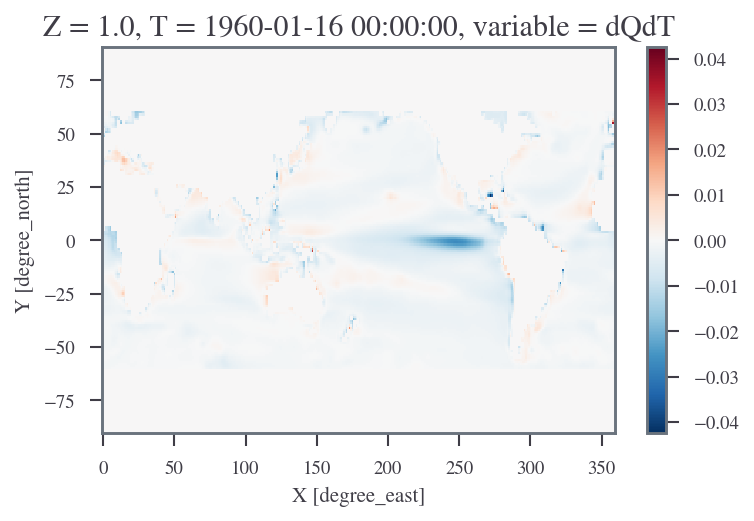

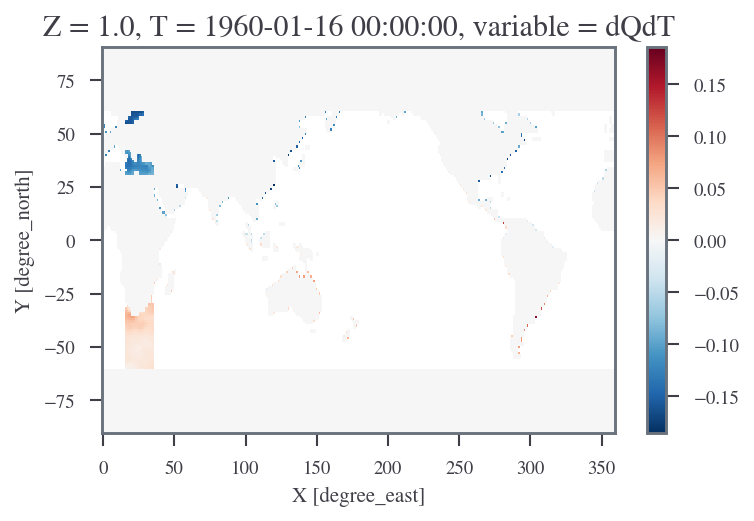

In [22]:
for i in range(1, 5):
    (
        (
            open_dataarray(setup.dq_dt(it=i)).isel(T=0)
            - open_dataarray(setup.dq_dt(it=i-1)).isel(T=0)
        )
        / open_dataarray(setup.dq_dt(it=i-1)).isel(T=0)
    ).plot()
    plt.show()

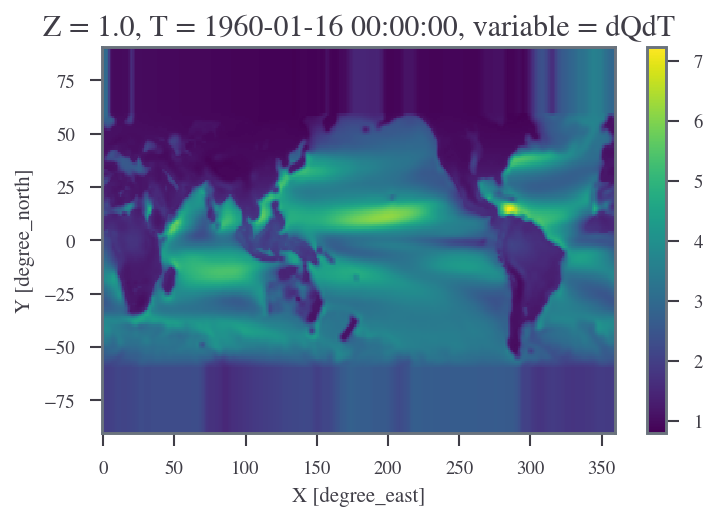

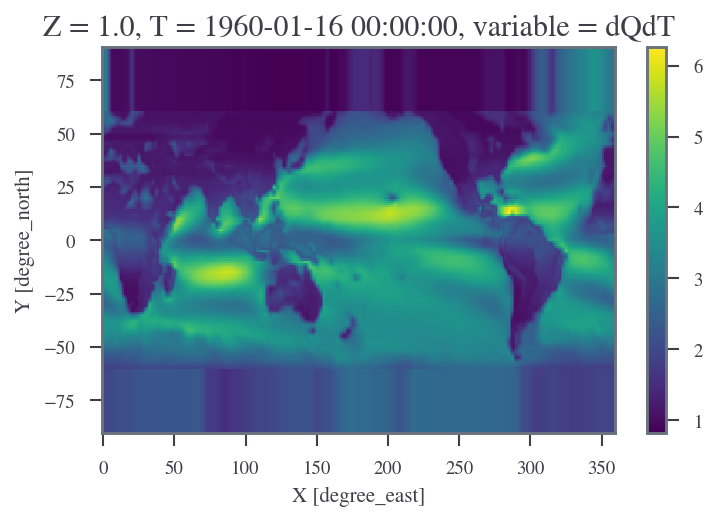

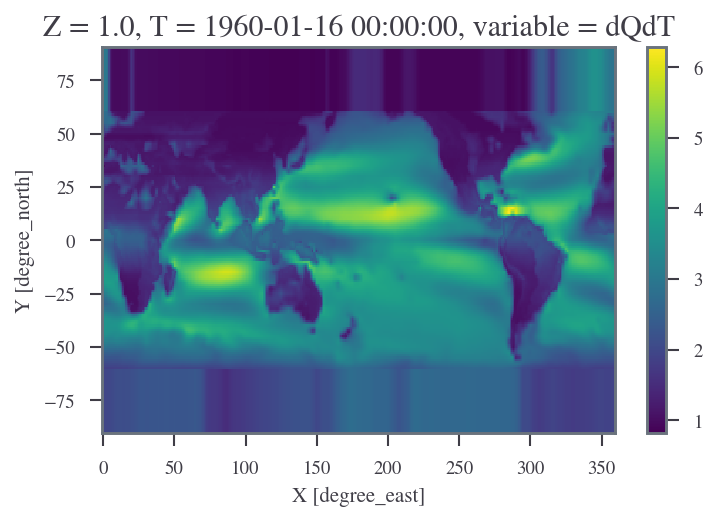

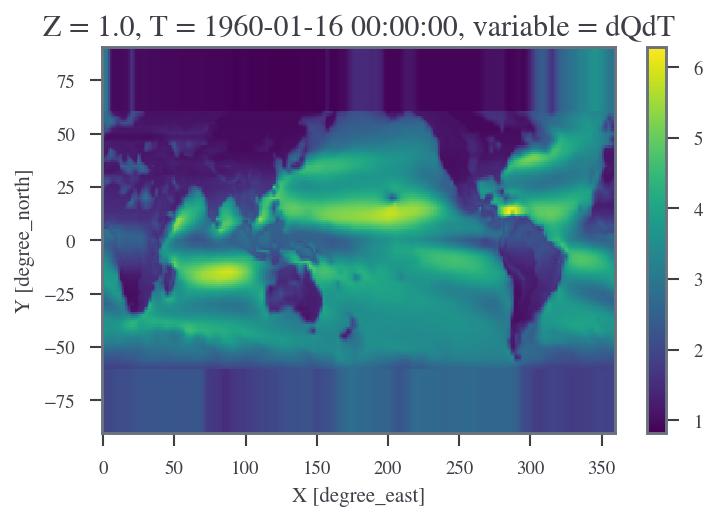

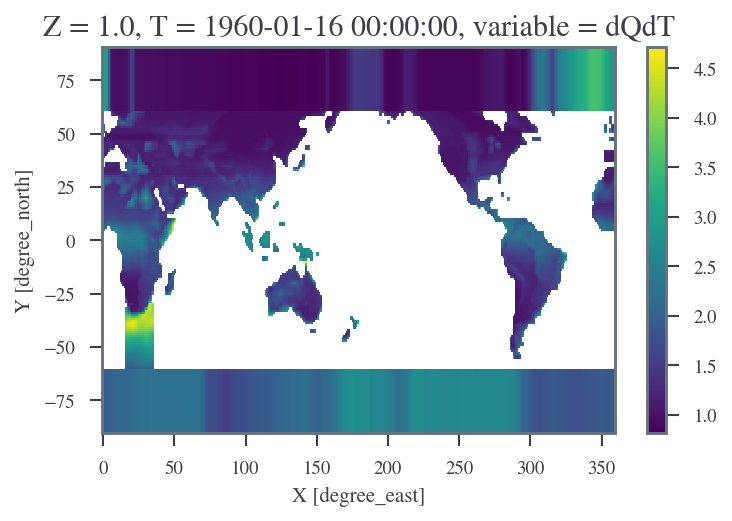

In [23]:
for i in range(0, 5):
    open_dataarray(setup.dq_dt(it=i)).isel(T=0).plot()
    plt.show()

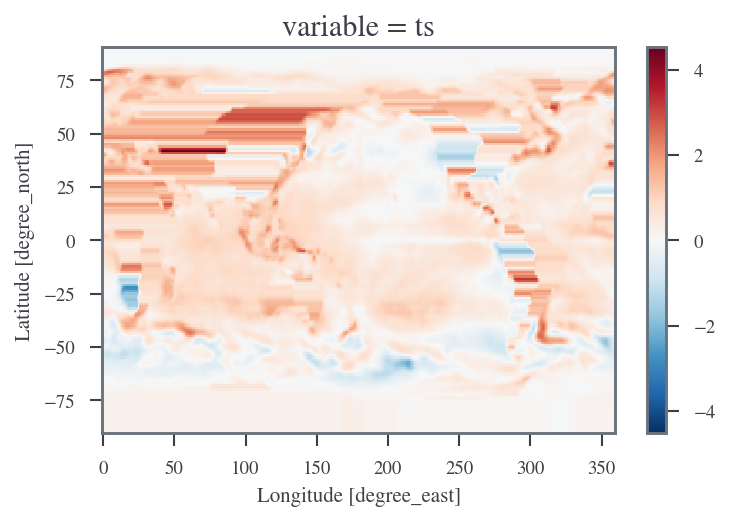

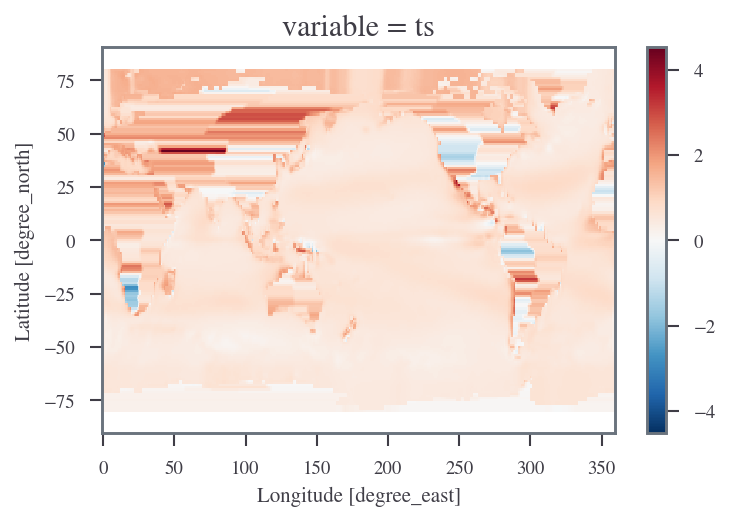

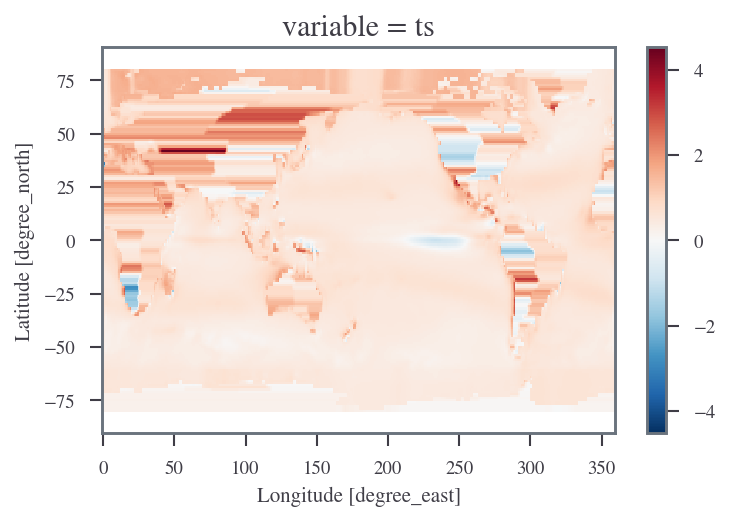

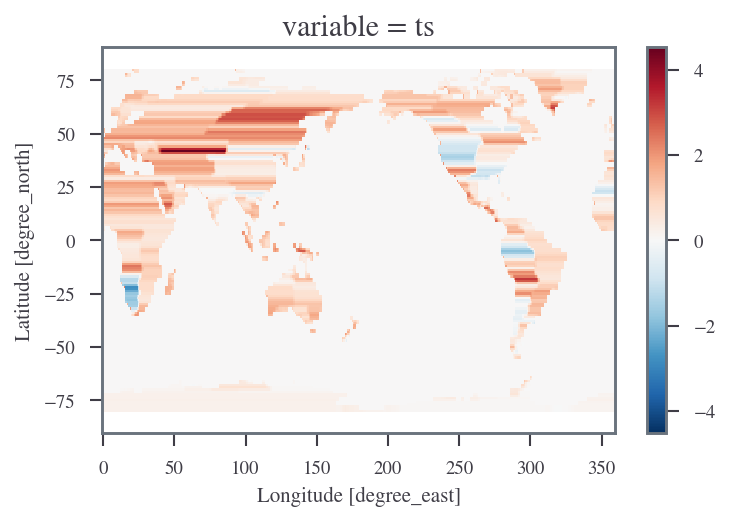

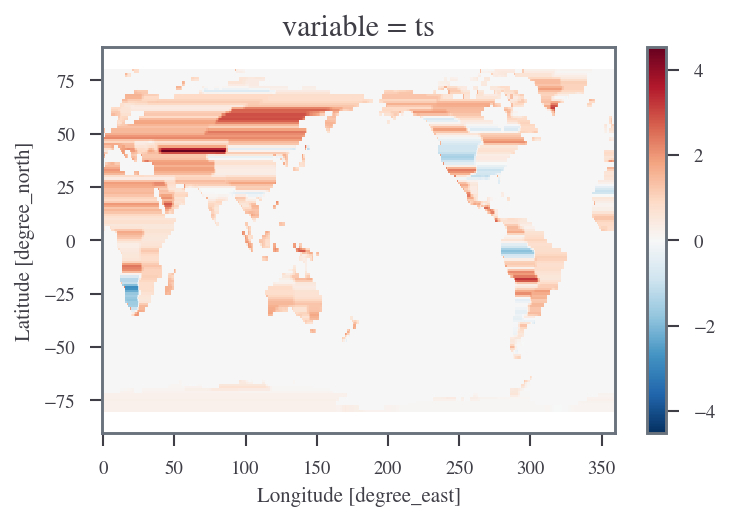

In [24]:
for i in range(0, 5):
    open_dataarray(setup.ts_trend(it=i)).plot()
    plt.show()